In [5]:
import os, sys
import h5py
import numpy as np
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import optimize
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.font_manager as font_manager
from tqdm.autonotebook import tqdm
from matplotlib.backends.backend_pdf import PdfPages
import time
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy import stats
import scipy.stats

import etroc1_array

In [6]:
# path = '../../../CMS ETL ASIC/ETROC1/test/test results/SMU/ETROC1 arrary at smu/2020-06-30_Array_Test_Results/'
# path = './data/Scan_PhaseAdj_QInj=2M5_QSel=6fC_V1/'
# path = './data/Scan_PhaseAdj_QInj=5M_QSel=6fC/'
# path = './data/Scan_PhaseAdj_QInj=1M25_QSel=6fC/'
# path = './data/Scan_PhaseAdj_QInj=400K_QSel=6fC/'
# path = './data/Scan_PhaseAdj_QInj=10M_QSel=6fC/'
# path = './data/Scan_PhaseAdj_DAC=415_QInj=10M_QSel=6fC/'
# path = './data/Scan_PhaseAdj_DAC=415_QInj=20M_QSel=6fC/'
# path = './data/Scan_Threshold_1M25_QSel=6fC/'  ## scan around 200
path = './data/Test_Pattern_Data/'    ## no scan, at 201
# file_in = 'Array_Data_Pixel=15_DAC_P15=409_QSel=6_CLSel=1_RfSel=3_IBSel=7_TDC_testMode=0_PhaseAdj=30_TDC_Mode_Output_B1_1000000_2020-07-01_17-22-24.dat'
# file_in = 'Array_Data_Pixel=15_DAC_P15=409_QSel=18_CLSel=1_RfSel=3_IBSel=7_TDC_testMode=0_PhaseAdj=30_TDC_Mode_Output_B1_1000000_2020-07-01_17-23-08.dat'
file_in = 'Array_T_Pixel=15_DAC_P15=414_QSel=6_CLSel=0_RfSel=3_IBSel=7_TDC_testMode=0_PhaseAdj=044_B1_200000_07-13_14-47-52.dat'

datapath = os.listdir(path)
file_in = [item for item in datapath if item.split('.')[1]=='dat']

# print(file_in)
num_file = len(file_in)

# qinj_base = 16    ##  2.5 MHz Qinj frequency
# qinj_base = 2       ##  20 MHz
# qinj_base = 100       ##  400 kHz
qinj_base = 32       ##  1.25 MHz

# toa=np.array([0]*num_file)
# print('toa is',toa)



toa_list = []
toa_mu_list = []
toa_std_list = []
tot_list = []
tot_mu_list = []
tot_std_list = []
cal_list = []
cal_mu_list = []
cal_std_list = []
hitposition_list = []
hitposition_mod_list = []
phase_list=[]
events_list = []
i=0
for item in tqdm(file_in):
    f_r = open(path+file_in[i], 'r')
    lines = f_r.readlines()
    f_r.close()
    
    num_lines = len(lines)
    
#     print('number of lines is', num_lines)
    
    word_to_plot = num_lines
    
#     print(lines[0])
#     print('hitflag is',lines[0].split()[3])
    
#     print(lines[0])
#     print('toa is',int(lines[0].split()[0]))
    
#     print('split is',lines[0].split())
    
    
    toa = []
    tot = []
    cal = []
    hitposition = []
    hitposition_mod = []
    events = 0
    for m in range (0, num_lines):
        line_item = lines[m]
        if line_item.split()[3] == '1':
            toa += [int(lines[i].split()[0])]
            tot += [int(line_item.split()[1])]
            cal += [int(line_item.split()[2])]
            hitposition += [m]
            hitposition_mod += [m%qinj_base]
            events = events + 1
    
    toa_mu = np.mean(toa)
    toa_std = np.std(toa)
    tot_mu = np.mean(tot)
    tot_std = np.std(tot)
    cal_mu = np.mean(cal)
    cal_std = np.std(cal)
    
    PhaseAdj = int(file_in[i].split("=")[8].split('_')[0])
    
    toa_list.append(toa)
    toa_mu_list.append(toa_mu)
    toa_std_list.append(toa_std)
    tot_list.append(tot)
    tot_mu_list.append(tot_mu)
    tot_std_list.append(tot_std)
    cal_list.append(cal)
    cal_mu_list.append(cal_mu)
    cal_std_list.append(cal_std)
    hitposition_list.append(hitposition)
    hitposition_mod_list.append(hitposition_mod)
    phase_list.append(PhaseAdj)
    events_list.append(events)
    
    i += 1
        
#     print('toa[0:5] is', toa[0:5])
#     print('tot[0:5] is', tot[0:5])
#     print('cal[0:5] is', cal[0:5])
#     print('hitposition[0:5] is', hitposition[0:5])
#     print('hitposition_mod[0:5] is', hitposition_mod[0:5])
    
num_bin = None

print(phase_list)

    


[201]


[20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21, 20, 21,

(array([6250.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6250.]),
 array([20. , 20.1, 20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21. ]),
 <a list of 10 Patch objects>)

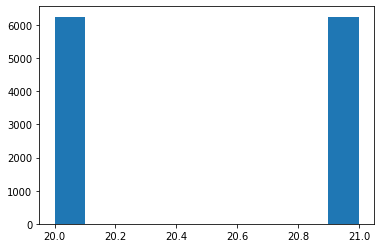

In [8]:
qinj_base = 32       ##  1.25 MHz
print(hitposition_mod_list[0])
plt.hist(hitposition_mod_list[0])

In [ ]:
print(phase_list)
print(events_list)

pp = PdfPages(path+"plots"+".pdf")

#######################  plot  ############################################
######### Plot events  ##############
fig, ax1 = plt.subplots(dpi=200)
ax1.plot(phase_list, events_list, 'o-', linewidth=2, label='number of hits', )
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.grid()
ax1.set(xlabel='phase setting', ylabel='number of hits',
       title='number of hits VS Phase Setting')
ax1.legend(loc='best')
plt.show()
pp.savefig(fig)
plt.close(fig)



phase_list_np = np.array(phase_list)
toa_mu_list_np = np.array(toa_mu_list)
popt_toa, pcov_toa = curve_fit(etroc1_array.func1, phase_list_np, toa_mu_list_np)

######### Plot TOA Code  ##############
fig, ax1 = plt.subplots(dpi=200)
ax1.errorbar(phase_list, toa_mu_list, toa_std_list,label='TOA',
             elinewidth=1, linewidth=0.2, capthick=0.5, capsize=0.5, markersize=1, marker='o')
ax1.plot(phase_list_np, etroc1_array.func1(phase_list_np, *popt_toa), 
         label='fitted TOA mean vs phase setting: \na=%5.2e, b=%5.2e, c=%5.2e, d=%5.2e' % tuple(popt_toa))
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.grid()
ax1.set(xlabel='phase setting', ylabel='TOA Code',
       title='TOA Code VS Phase Setting, #events = %d'%(events))
ax1.legend(loc='best')
plt.show()
pp.savefig(fig)
plt.close(fig)

popt_toa0, pcov_toa0 = curve_fit(etroc1_array.func0, phase_list_np, toa_mu_list_np)
######### Plot TOA Code error  ##############
fig, ax1 = plt.subplots(dpi=200)
ax1.plot(phase_list_np, toa_mu_list_np - etroc1_array.func0(phase_list_np, *popt_toa0), '-',
         label='TOA mean - fitted TOA mean(1st order)')
ax1.plot(phase_list_np, toa_mu_list_np - etroc1_array.func1(phase_list_np, *popt_toa), '-',
         label='TOA mean - fitted TOA mean(3rd order polynomial)')
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.grid()
ax1.set(xlabel='phase setting', ylabel='TOA Code',
       title='TOA Error VS Phase Setting')
ax1.legend(loc='best')
plt.show()
pp.savefig(fig)
plt.close(fig)


######### Plot TOT Code  ##############
fig, ax1 = plt.subplots(dpi=200)
ax1.errorbar(phase_list, tot_mu_list, tot_std_list,label='TOT',
             elinewidth=2, linewidth=1, capthick=0.5, capsize=0.5, markersize=1, marker='o')
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.grid()
ax1.set(xlabel='phase setting', ylabel='TOT Code',
       title='TOT Code VS Phase Setting, #events = %d'%(events))
ax1.legend(loc='best')
plt.show()
pp.savefig(fig)
plt.close(fig)

######### Plot CAL Code  ##############
fig, ax1 = plt.subplots(dpi=200)
ax1.errorbar(phase_list, cal_mu_list, cal_std_list,label='Cal',
             elinewidth=2, linewidth=1, capthick=0.5, capsize=0.5, markersize=1, marker='o')
# ax1.set_xlim(left=left_limit,right=right_limit)
ax1.grid()
ax1.set(xlabel='phase setting', ylabel='CAL Code',
       title='Cal Code VS Phase Setting, #events = %d'%(events))
ax1.legend(loc='best')
plt.show()
pp.savefig(fig)
plt.close(fig)

pp.close()